/tmp/ipython-input-4284555099.py:48: RuntimeWarning: overflow encountered in scalar multiply
  P = alfa - (upsilon + miu + sigma + lamda1*s[j-1])*p[j-1]
/tmp/ipython-input-4284555099.py:49: RuntimeWarning: overflow encountered in scalar multiply
  S = (lamda1*p[j-1] + delta*q[j-1] - (miu + kappa + zeta))*s[j-1]
/tmp/ipython-input-4284555099.py:50: RuntimeWarning: overflow encountered in scalar multiply
  Q = zeta*s[j-1] - (delta*s[j-1] + eta + miu + xi)*q[j-1]
/tmp/ipython-input-4284555099.py:50: RuntimeWarning: invalid value encountered in scalar subtract
  Q = zeta*s[j-1] - (delta*s[j-1] + eta + miu + xi)*q[j-1]
/tmp/ipython-input-4284555099.py:44: RuntimeWarning: invalid value encountered in scalar add
  sp += c[v] * p[j-v-1]
/tmp/ipython-input-4284555099.py:45: RuntimeWarning: invalid value encountered in scalar add
  ss += c[v] * s[j-v-1]


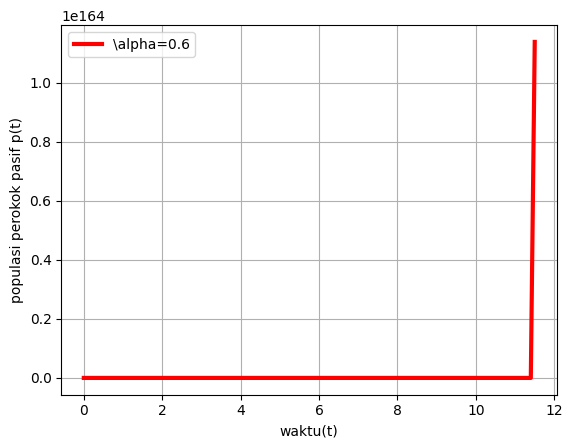

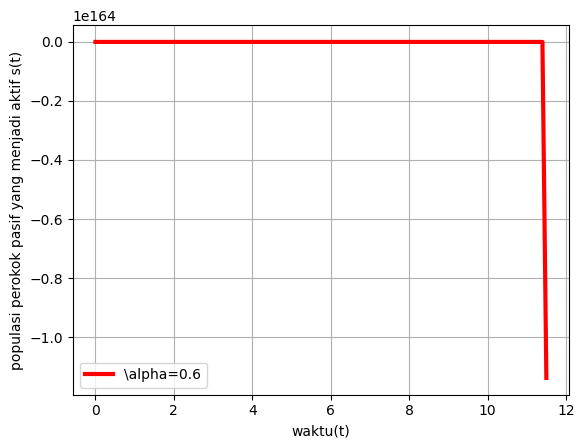

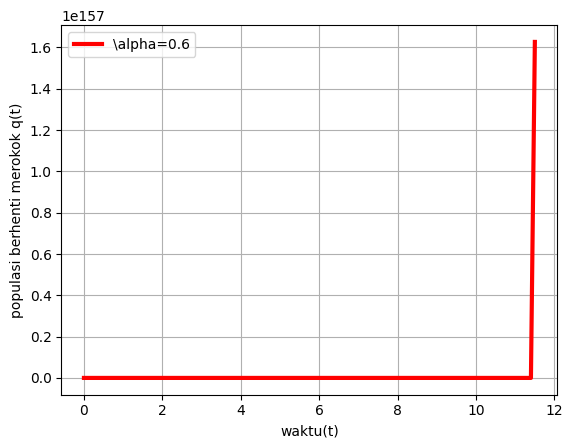

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Parameter dan inisialisasi
h = 0.1
t = np.arange(0, 400+h, h)
N = len(t)
p = np.zeros(N)
s = np.zeros(N)
q = np.zeros(N)

lamda1 = 0.2
lamda2 = 0.165
zeta = 0.2
eta = 0.02
kappa = 0.01
sigma = 0.2
miu = 0.0035
xi = 0.1
upsilon = 0.01
delta = 0.05
alfa = 0.3

af = 0.6

p[0] = 0.8846
s[0] = 0.7085
q[0] = 0.8916

c = np.zeros(N)
r = np.zeros(N)
c[0] = af
r[0] = 1 / gamma(1 - af)

# Iterasi untuk menghitung p, s, dan q
for j in range(1, N):
    r[j] = ((j-1) - af) / gamma(1 - af)
    c[j] = (1 - ((1 + af) / j)) * c[j-1]
    sp = 0
    ss = 0
    sq = 0
    for v in range(j-1):
        sp += c[v] * p[j-v-1]
        ss += c[v] * s[j-v-1]
        sq += c[v] * q[j-v-1]

    P = alfa - (upsilon + miu + sigma + lamda1*s[j-1])*p[j-1]
    S = (lamda1*p[j-1] + delta*q[j-1] - (miu + kappa + zeta))*s[j-1]
    Q = zeta*s[j-1] - (delta*s[j-1] + eta + miu + xi)*q[j-1]

    p[j] = sp + (r[j-1] * p[0]) + (h**af) * P
    s[j] = ss + (r[j-1] * s[0]) + (h**af) * S
    q[j] = sq + (r[j-1] * q[0]) + (h**af) * Q

# Plotting hasil
plt.figure(1)
plt.plot(t, p, 'r', linewidth=3)
plt.legend(['\\alpha=0.6'])
plt.xlabel('waktu(t)')
plt.ylabel('populasi perokok pasif p(t)')
plt.grid(True)

plt.figure(2)
plt.plot(t, s, 'r', linewidth=3)
plt.legend(['\\alpha=0.6'])
plt.xlabel('waktu(t)')
plt.ylabel('populasi perokok pasif yang menjadi aktif s(t)')
plt.grid(True)

plt.figure(3)
plt.plot(t, q, 'r', linewidth=3)
plt.legend(['\\alpha=0.6'])
plt.xlabel('waktu(t)')
plt.ylabel('populasi berhenti merokok q(t)')
plt.grid(True)

plt.show()